### Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV
from keras.datasets import mnist

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


# Loading and Process of data

In [ ]:
#
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Normalize byte [0,255] -> [0,1]
train_X = train_X / 255.0
test_X = test_X / 255.0

#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
# Add batch size, since the last dim is not explicity set to 1.
train_X = np.expand_dims(train_X, axis=-1) # <--- add batch axis
test_X = np.expand_dims(test_X, axis=-1) # <--- add batch axis
#
imageShape = train_X[0].shape

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
print(imageShape)

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)
(28, 28, 1)


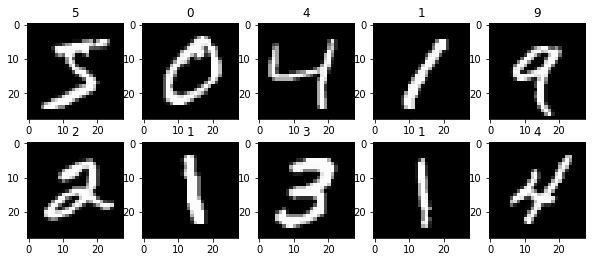

In [ ]:
plt.figure(figsize=(10, 4))
nrImage=10
for index, (image, label) in enumerate(zip(train_X[0:nrImage], train_y[0:nrImage])):
	plt.subplot(2, 5, index + 1)
	plt.title(str.format("{0}", label))
	plt.imshow(np.reshape(image, (28, 28)), cmap=plt.cm.gray)
plt.show()

# Common Functions

In [ ]:
training_size = len(train_X)
variance = 0.005
varThresh = VarianceThreshold(variance)
high_variance_training_data =  train_X# varThresh.fit(train_X)
high_variance_training_data_size = len(high_variance_training_data)
print(training_size) 
print(high_variance_training_data_size) 

60000
60000


In [ ]:
def plotCostHistory(history, loss_label ="", val_label = "", title ="", x_label = "", y_label =""):
    for k, v in history.items():
        plt.plot(v, label=k)
    plt.title(label=title)
    plt.ylabel(ylabel=y_label)
    plt.xlabel(xlabel=x_label)
    plt.legend(loc="upper left")
    plt.show()

# Forward Neuron Network 

In [ ]:
def make_forward_neuron_network(shape):
	#
	model = tf.keras.Sequential()
	model.add(layers.Flatten(input_shape=shape)) 
	model.add(layers.Dense(64))
	model.add(layers.Dropout(0.3))
 
	model.add(layers.Dense(96))
	model.add(layers.Dropout(0.3))

	model.add(layers.Dense(96))
	model.add(layers.Dropout(0.3))
	model.add(layers.Dense(10))

	return model

In [ ]:
BUFFER_SIZE = 256
BATCH_SIZE = 32
EPOCH = 32

forward_neuron_network_model = make_forward_neuron_network(imageShape)
forward_neuron_network_model.summary()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam(1e-4)



forward_neuron_network_model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 96)                6240      
                                                                 
 dropout_8 (Dropout)         (None, 96)                0         
                                                                 
 dense_12 (Dense)            (None, 96)                9312      
                                                                 
 dropout_9 (Dropout)         (None, 96)               

In [ ]:
checkpoint_filepath_forward_NN = os.path.join("checkpoints", "mnist_forward_neuron_network_ckpt")

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_forward_NN,
    save_weights_only=True,
    monitor='accuracy',
    save_freq='epoch',
    mode='max',
    save_best_only=True)

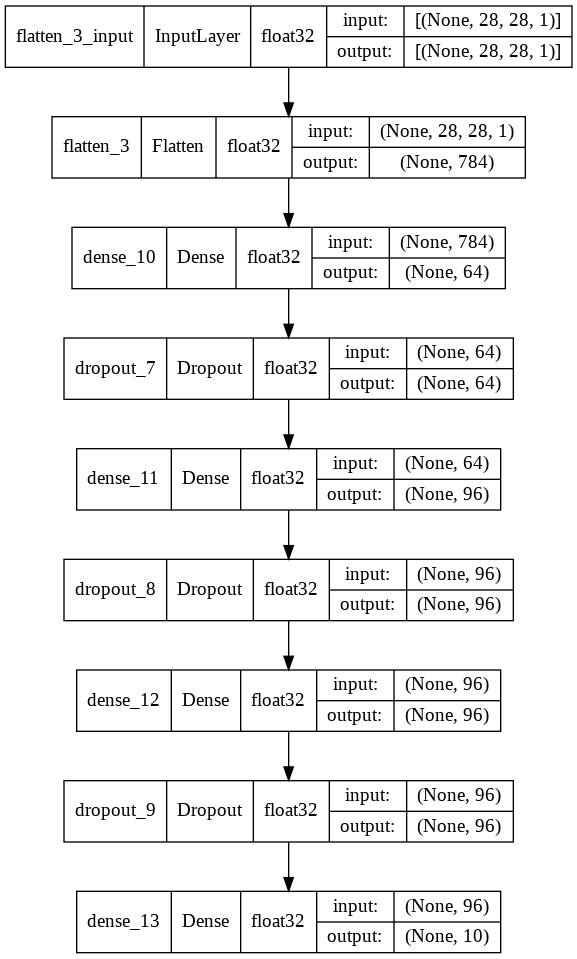

In [ ]:
tf.keras.utils.plot_model(
    forward_neuron_network_model, to_file='forward_model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

In [ ]:
forward_nn_history = forward_neuron_network_model.fit(high_variance_training_data, train_y, epochs=EPOCH, batch_size=BATCH_SIZE, callbacks=[model_checkpoint_callback])
forward_neuron_network_model.load_weights(checkpoint_filepath_forward_NN)

# Save the model for being reuse in other programs and etc.
forward_neuron_network_model.save('fnn_mnist.h5')

Epoch 1/32
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8287 - accuracy: 0.7332
Epoch 2/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4924 - accuracy: 0.8523
Epoch 3/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4487 - accuracy: 0.8683
Epoch 4/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4282 - accuracy: 0.8759
Epoch 5/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4103 - accuracy: 0.8815
Epoch 6/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3997 - accuracy: 0.8847
Epoch 7/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8866
Epoch 8/32
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3860 - accuracy: 0.8907
Epoch 9/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8910
Epoch 10/32
1875/1875 [==============================] - 5s 3ms/step - loss: 0.371

In [ ]:
forward_neuron_network_model.save('fnn_mnist.h5')

In [ ]:
result = forward_neuron_network_model.evaluate(test_X,  test_y, verbose=2)
print(result)

313/313 - 0s - loss: 0.2759 - accuracy: 0.9223 - 480ms/epoch - 2ms/step
[0.27593645453453064, 0.9222999811172485]


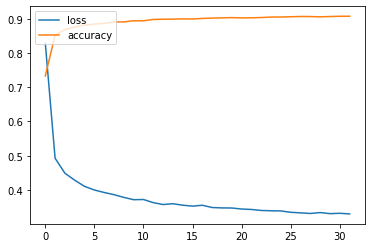

In [ ]:
plotCostHistory(forward_nn_history.history)

# Convolution Neuron Network

In [ ]:
def make_cnn_model(shape):
	cnn_model = tf.keras.Sequential()
	#
	cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',  padding='same',
							input_shape=shape))
	cnn_model.add(layers.MaxPooling2D((2, 2)))
	#
	cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
	cnn_model.add(layers.MaxPooling2D((2, 2)))
	cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))


	cnn_model.add(layers.Dropout(0.3))

	cnn_model.add(layers.Flatten())
	cnn_model.add(layers.Dense(64, activation='relu'))
	cnn_model.add(layers.Dense(10))
	return cnn_model

In [ ]:
BUFFER_SIZE = 256
BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices(high_variance_training_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
print(train_dataset)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(1e-4)

cnn_model = make_cnn_model((imageShape[0], imageShape[1], 1))
cnn_model.summary()
cnn_model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

checkpoint_filepath = os.path.join("checkpoints", "mnist_convolutional_neuron_network_ckpt")

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float64>
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                            

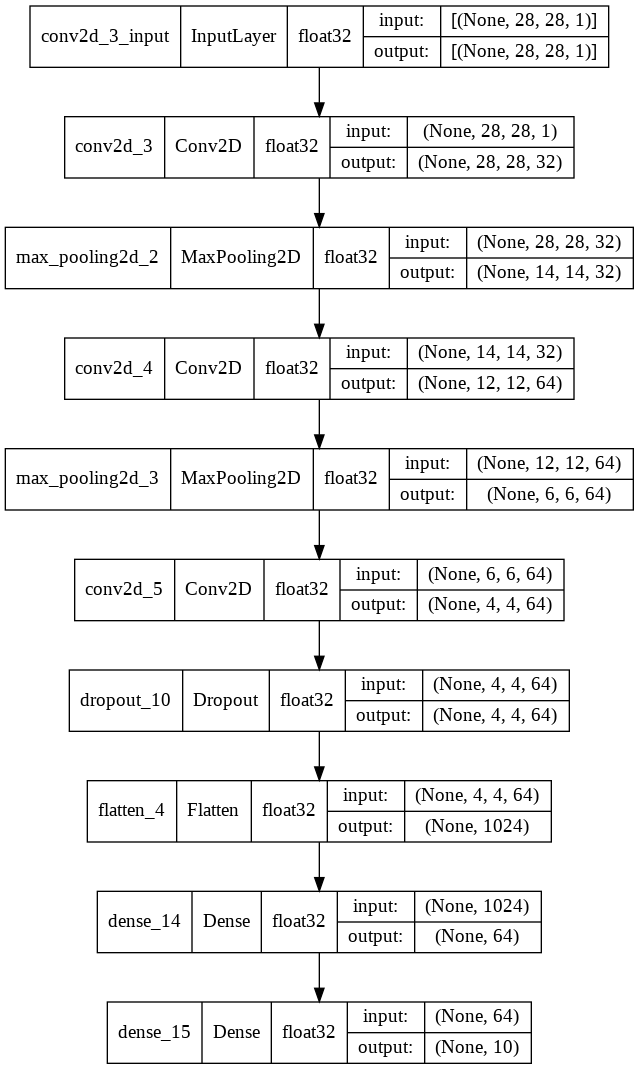

In [ ]:
tf.keras.utils.plot_model(
    cnn_model, to_file='cnn_model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None
)

In [ ]:
cnn_model_history = cnn_model.fit(train_X, train_y, epochs=EPOCH, validation_data=(test_X, test_y), callbacks=model_checkpoint_callback)
cnn_model.load_weights(checkpoint_filepath)

Epoch 1/32
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4133 - accuracy: 0.8735 - val_loss: 0.1160 - val_accuracy: 0.9638
Epoch 2/32
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1177 - accuracy: 0.9639 - val_loss: 0.0654 - val_accuracy: 0.9794
Epoch 3/32
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0838 - accuracy: 0.9745 - val_loss: 0.0475 - val_accuracy: 0.9845
Epoch 4/32
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.0405 - val_accuracy: 0.9867
Epoch 5/32
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0547 - accuracy: 0.9828 - val_loss: 0.0330 - val_accuracy: 0.9889
Epoch 6/32
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 7/32
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.0287 -

In [ ]:
cnn_model.save("cnn_mnist.h5")

In [ ]:
result = cnn_model.evaluate(test_X,  test_y, verbose=2)
print(result)

313/313 - 3s - loss: 0.0239 - accuracy: 0.9931 - 3s/epoch - 10ms/step
[0.023927632719278336, 0.9930999875068665]


In [ ]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 dropout_10 (Dropout)        (None, 4, 4, 64)         

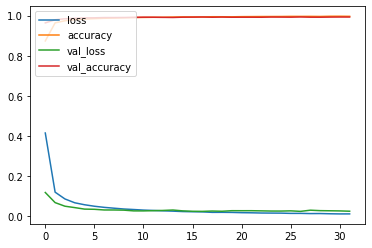

In [ ]:
plotCostHistory(cnn_model_history.history)